<a href="https://colab.research.google.com/github/SoheilBadri2000/House-Pred-CA/blob/main/4AI3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Canadian Real Estate Price Prediction

In [96]:
!gdown 1ZYhLFqdo9cFvvxyORfBnDSuX0htNKucAe-LpT4fCN04

Downloading...
From (original): https://drive.google.com/uc?id=1ZYhLFqdo9cFvvxyORfBnDSuX0htNKucAe-LpT4fCN04
From (redirected): https://docs.google.com/spreadsheets/d/1ZYhLFqdo9cFvvxyORfBnDSuX0htNKucAe-LpT4fCN04/export?format=xlsx
To: /content/data_full.xlsx
39.2MB [00:00, 70.5MB/s]


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
df = pd.read_excel("data_full.xlsx")

In [99]:
df.shape

(77455, 79)

In [100]:
df.head()

,id,id_mls,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,building_type,agency_name,agency_type,...,loc_greenery,loc_cycling_friendly,loc_car_friendly,loc_vibrant,loc_shopping,loc_daycares,loc_nightlife,loc_cafes,loc_quiet,loc_parks
0,26639235,24005541,3,0,4,2.5,2810.000000,House,RE/MAX PREFERRED REALTY LTD. - 585,Firm,...,0.0,3.5,3.0,1.5,2.5,5.0,2.0,3.0,5.0,3.5
1,26639230,24005774,2,0,2,1.0,1072.000000,Apartment,ROYAL LEPAGE BINDER REAL ESTATE - 640,Firm,...,0.0,3.0,4.5,1.0,3.0,4.5,0.5,1.5,4.5,3.5
2,26639229,24005776,3,0,4,2.0,1965.881818,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,0.0,2.5,4.0,0.5,1.0,5.0,0.0,1.0,5.0,0.0
3,26639225,24005786,1,0,4,1.0,1040.426146,House,REMO VALENTE REAL ESTATE (1990) LIMITED - 790,Firm,...,0.0,3.5,3.5,2.0,2.0,4.0,2.0,2.5,3.0,3.5
4,26638943,24005775,1,0,3,1.0,3718.455676,House,RE/MAX CAPITAL DIAMOND REALTY - 821,Firm,...,0.0,3.0,4.0,1.5,2.0,4.0,1.5,2.0,4.0,3.5


In [101]:
df.columns

Index(['id', 'id_mls', 'bathrooms_total', 'bedrooms_extra', 'bedrooms',
       'stories_total', 'size_interior', 'building_type', 'agency_name',
       'agency_type', 'property_type', 'lng', 'lat', 'ownership_type',
       'ownership_type_group_ids', 'land_size', 'parkings', 'page_url',
       'timestamp', 'postal_code', 'province', 'price', 'household_income',
       'individual_income', 'commute_transit', 'commute_foot',
       'commute_bicycle', 'commute_drive', 'single_family', 'multi_family',
       'single_person', 'multi_person', 'total_individuals', 'age_0_to_4',
       'age_5_to_9', 'age_10_to_14', 'age_15_to_19', 'age_20_to_34',
       'age_35_to_49', 'age_50_to_64', 'age_65_to_79', 'age_80_plus', 'owners',
       'renters', 'lang_en_only', 'lang_fr_only', 'lang_en_and_fr',
       'lang_other', 'edu_no_high_school', 'edu_high_school',
       'edu_trade_certificate', 'edu_college_certificate',
       'edu_university_certificate', 'edu_bachelor_degree',
       'edu_post_graduat

In [102]:
df["province"].value_counts()

province
Ontario                    32102
British Columbia           18114
Alberta                    10958
Quebec                      6869
Saskatchewan                3513
Manitoba                    2378
Nova Scotia                 1597
New Brunswick               1137
Prince Edward Island         342
Newfoundland & Labrador      318
Yukon                         81
Northwest Territories         46
Name: count, dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77455 entries, 0 to 77454
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          77455 non-null  int64  
 1   id_mls                      77455 non-null  object 
 2   bathrooms_total             77455 non-null  int64  
 3   bedrooms_extra              77455 non-null  int64  
 4   bedrooms                    77455 non-null  int64  
 5   stories_total               77455 non-null  float64
 6   size_interior               77455 non-null  float64
 7   building_type               77455 non-null  object 
 8   agency_name                 77455 non-null  object 
 9   agency_type                 77455 non-null  object 
 10  property_type               77455 non-null  object 
 11  lng                         77455 non-null  float64
 12  lat                         77455 non-null  float64
 13  ownership_type              774

## Removing Unwanted Features

In [104]:
df = df.drop(["id", "id_mls", "agency_name", "agency_type", "property_type", "ownership_type", "land_size", "page_url", "timestamp", "postal_code"], axis=1)

In [105]:
df["ownership_type_group_ids"] = df["ownership_type_group_ids"].astype("string")

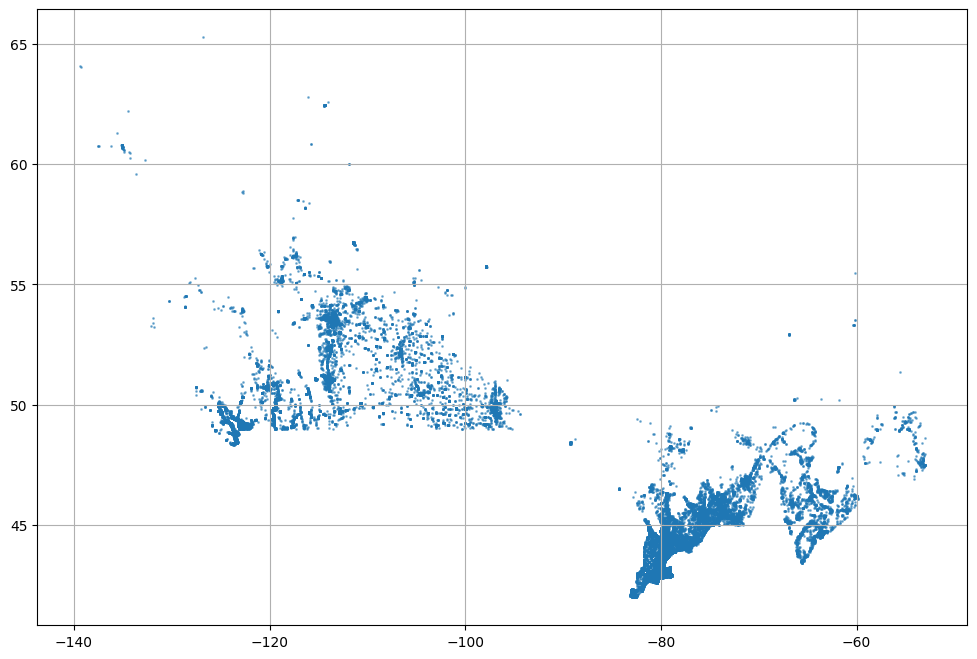

In [106]:
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(df["lng"], df["lat"], alpha=0.5, s=1)

In [107]:
np.round(df.describe())

,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,lng,lat,parkings,price,household_income,...,loc_greenery,loc_cycling_friendly,loc_car_friendly,loc_vibrant,loc_shopping,loc_daycares,loc_nightlife,loc_cafes,loc_quiet,loc_parks
count,77455.0,77455.0,77455.0,77455.0,77455.0,77455.0,77455.0,77455.0,77455.0,76753.0,...,77404.0,77404.0,77404.0,77404.0,77404.0,77404.0,77404.0,77404.0,77404.0,77404.0
mean,2.0,0.0,3.0,1.0,1566.0,-95.0,47.0,2.0,881885.0,128016.0,...,0.0,3.0,4.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0
std,1.0,1.0,1.0,0.0,723.0,21.0,4.0,3.0,741439.0,41901.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
min,0.0,0.0,0.0,1.0,366.0,-139.0,42.0,0.0,54900.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,2.0,1.0,1049.0,-114.0,44.0,0.0,474894.0,102735.0,...,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
50%,2.0,0.0,3.0,1.0,1410.0,-81.0,46.0,2.0,699000.0,121958.0,...,0.0,2.0,4.0,1.0,2.0,3.0,0.0,2.0,4.0,2.0
75%,3.0,0.0,4.0,2.0,1938.0,-79.0,50.0,4.0,1020400.0,144000.0,...,0.0,3.0,5.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0
max,7.0,2.0,8.0,3.0,4666.0,-53.0,65.0,13.0,12000000.0,1067109.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


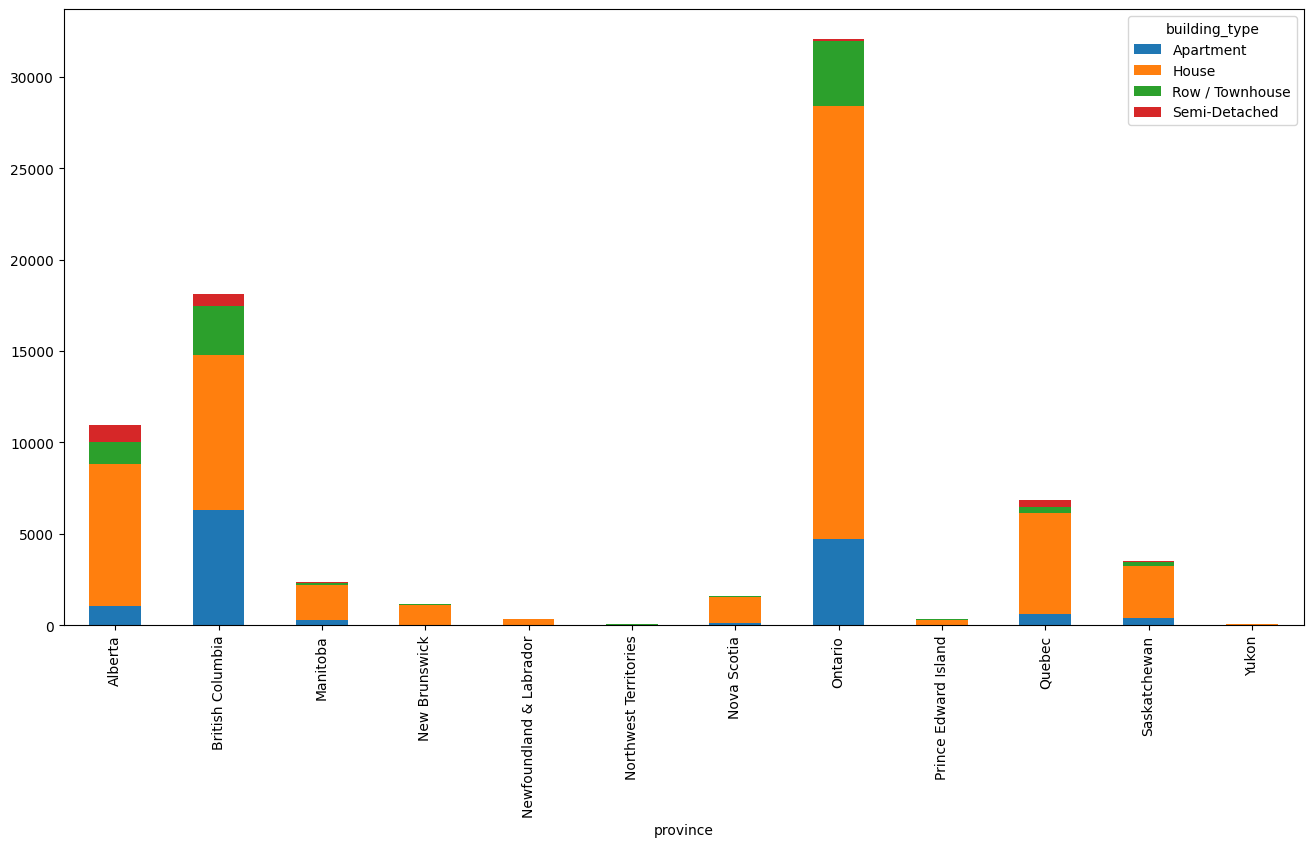

In [108]:
crosstab_building_type = pd.crosstab(df["province"], df["building_type"])
crosstab_building_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

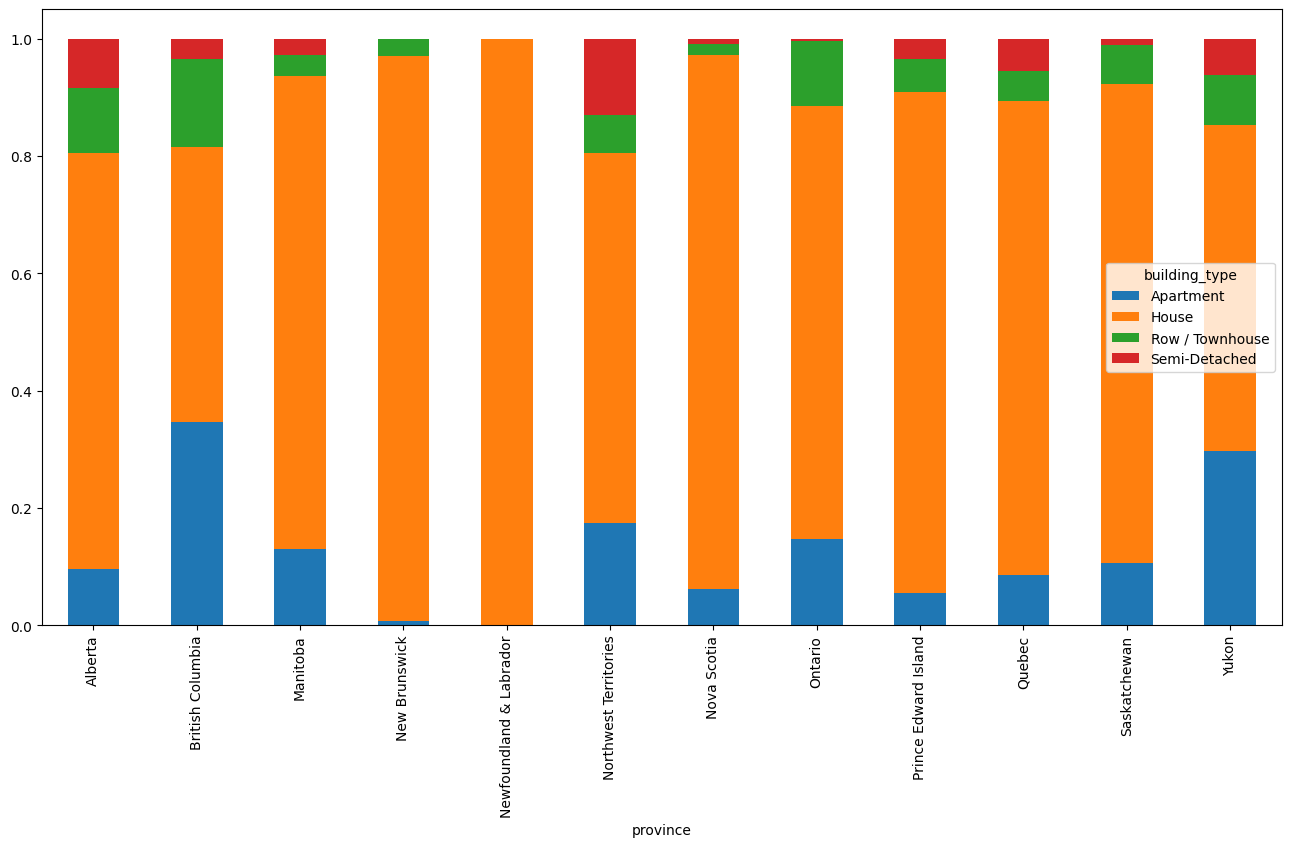

In [109]:
crosstab_building_type_norm = crosstab_building_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_building_type_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

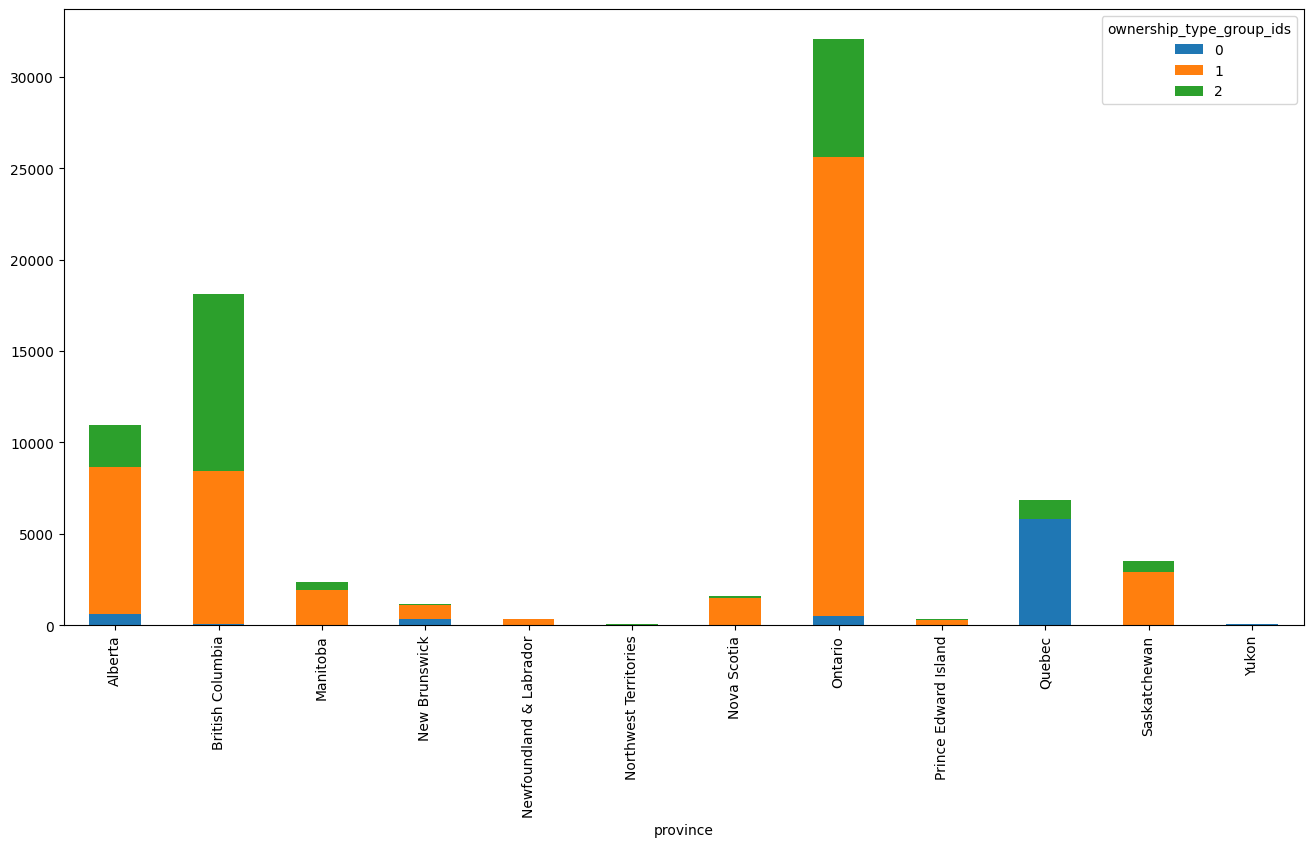

In [110]:
crosstab_ownership_type = pd.crosstab(df["province"], df["ownership_type_group_ids"])
crosstab_ownership_type.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

# 1: Freehold
# 2: Strata / Condo
# 3: Other

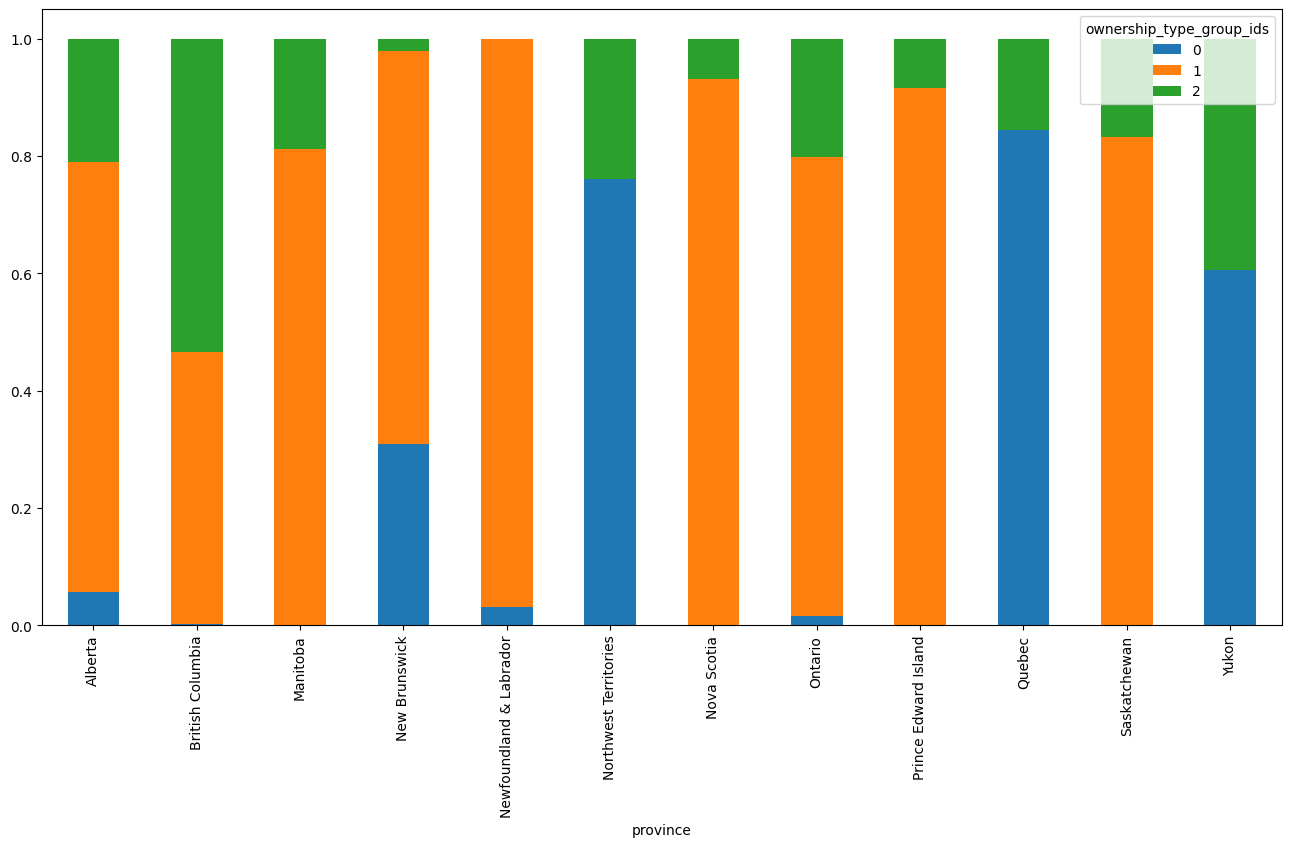

In [111]:
crosstab_ownership_type_norm = crosstab_ownership_type.div(crosstab_building_type.sum(1), axis=0)
crosstab_ownership_type_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

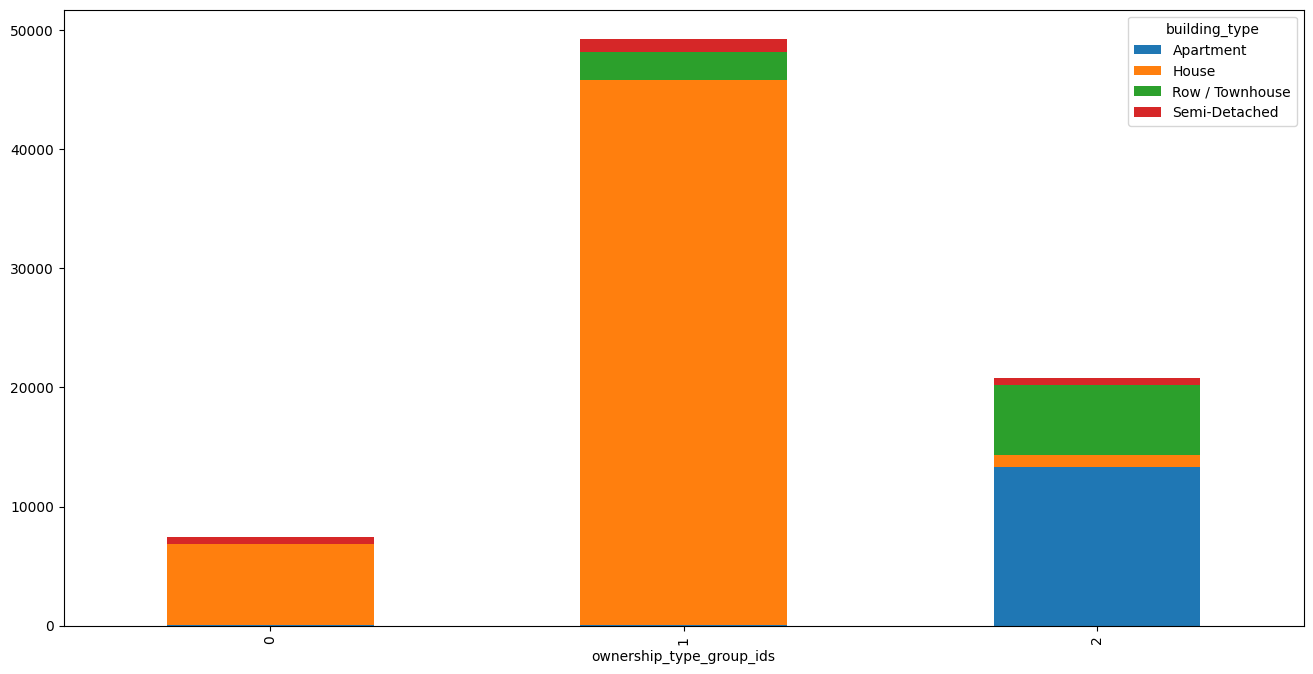

In [112]:
crosstab_ot_bt = pd.crosstab(df["ownership_type_group_ids"], df["building_type"])
crosstab_ot_bt.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

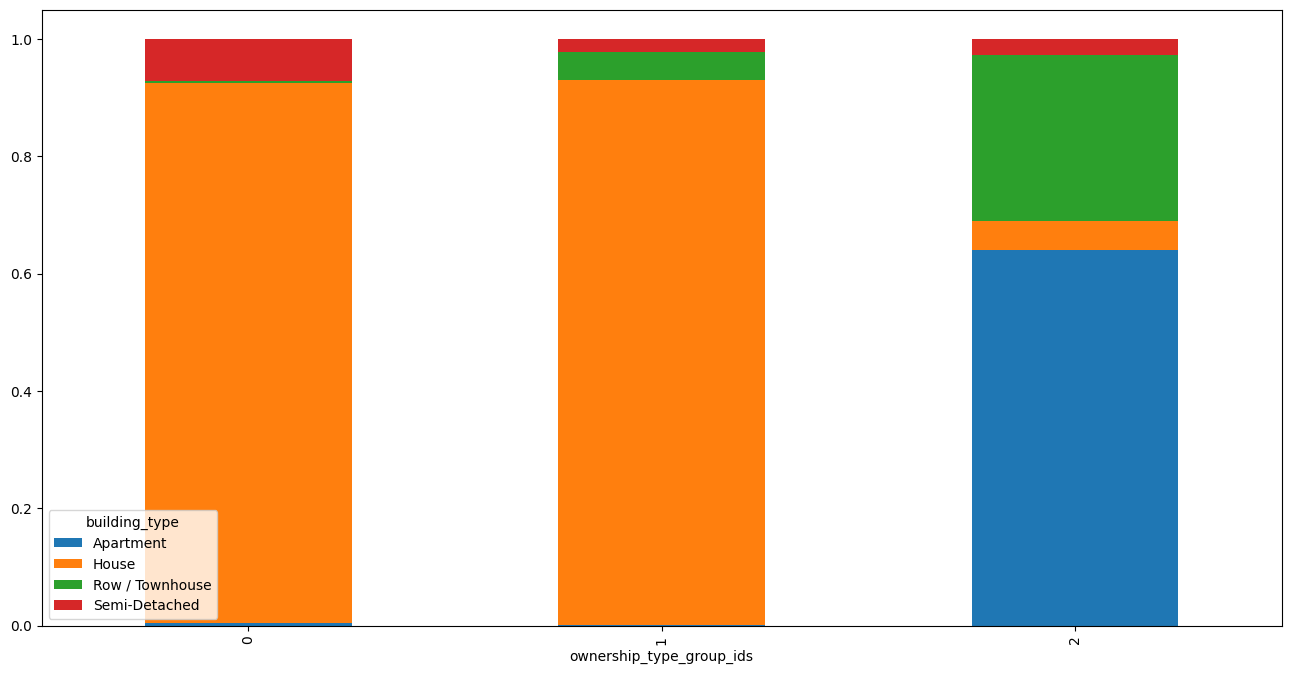

In [113]:
crosstab_ot_bt = pd.crosstab(df["ownership_type_group_ids"], df["building_type"])
crosstab_ot_bt_norm = crosstab_ot_bt.div(crosstab_ot_bt.sum(1), axis=0)
crosstab_ot_bt_norm.plot(kind="bar", stacked=True, figsize=(16,8))
plt.show()

# Subdivide and encode data

In [114]:
df_enc = pd.get_dummies(df[df["province"] == "Ontario"])
df_enc = df_enc.drop("province_Ontario", axis=1)
df_enc.shape

(32102, 73)

In [115]:
np.round(df_enc.describe())

,bathrooms_total,bedrooms_extra,bedrooms,stories_total,size_interior,lng,lat,parkings,price,household_income,...,loc_greenery,loc_cycling_friendly,loc_car_friendly,loc_vibrant,loc_shopping,loc_daycares,loc_nightlife,loc_cafes,loc_quiet,loc_parks
count,32102.0,32102.0,32102.0,32102.0,32102.0,32102.0,32102.0,32102.0,32102.0,31961.0,...,32070.0,32070.0,32070.0,32070.0,32070.0,32070.0,32070.0,32070.0,32070.0,32070.0
mean,3.0,0.0,3.0,1.0,1527.0,-79.0,44.0,3.0,952304.0,131251.0,...,0.0,2.0,4.0,1.0,2.0,2.0,1.0,2.0,4.0,2.0
std,1.0,1.0,1.0,1.0,656.0,2.0,1.0,3.0,603868.0,42385.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0
min,0.0,0.0,0.0,1.0,366.0,-127.0,42.0,0.0,169900.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.0,0.0,2.0,1.0,1058.0,-80.0,43.0,1.0,599900.0,104862.0,...,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
50%,2.0,0.0,3.0,1.0,1424.0,-80.0,44.0,3.0,799900.0,124633.0,...,0.0,2.0,4.0,1.0,2.0,2.0,0.0,2.0,4.0,2.0
75%,3.0,1.0,3.0,2.0,1884.0,-79.0,44.0,6.0,1100000.0,147554.0,...,0.0,3.0,5.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0
max,7.0,2.0,8.0,3.0,4666.0,-74.0,65.0,13.0,11995000.0,890316.0,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


## FIll out missing values with KNN

In [116]:
from sklearn.impute import KNNImputer

In [117]:
imputer = KNNImputer(n_neighbors=5)
columns = df_enc.columns
df_enc = imputer.fit_transform(df_enc)
df_enc = pd.DataFrame(df_enc, columns=columns)

In [118]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32102 entries, 0 to 32101
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bathrooms_total                32102 non-null  float64
 1   bedrooms_extra                 32102 non-null  float64
 2   bedrooms                       32102 non-null  float64
 3   stories_total                  32102 non-null  float64
 4   size_interior                  32102 non-null  float64
 5   lng                            32102 non-null  float64
 6   lat                            32102 non-null  float64
 7   parkings                       32102 non-null  float64
 8   price                          32102 non-null  float64
 9   household_income               32102 non-null  float64
 10  individual_income              32102 non-null  float64
 11  commute_transit                32102 non-null  float64
 12  commute_foot                   32102 non-null 

In [119]:
df_enc["price"]

0         849900.0
1         399900.0
2         959900.0
3         299900.0
4         399000.0
           ...    
32097    1399000.0
32098     429000.0
32099     259000.0
32100     749900.0
32101     375000.0
Name: price, Length: 32102, dtype: float64

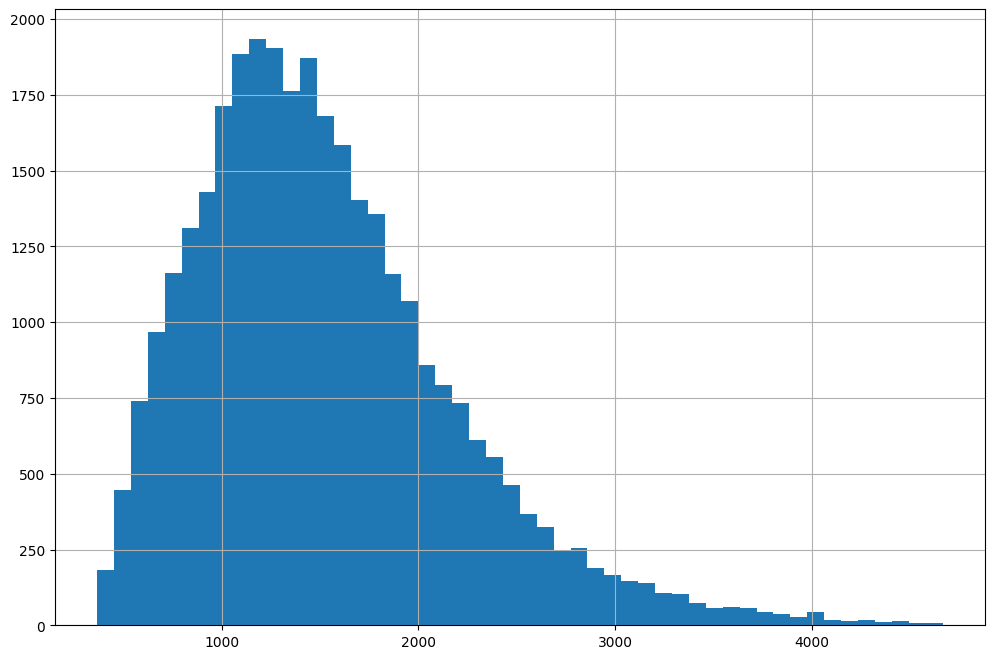

In [120]:
plt.figure(figsize=(12,8))
plt.grid()
plt.hist(df_enc["size_interior"], bins=50)
plt.show()

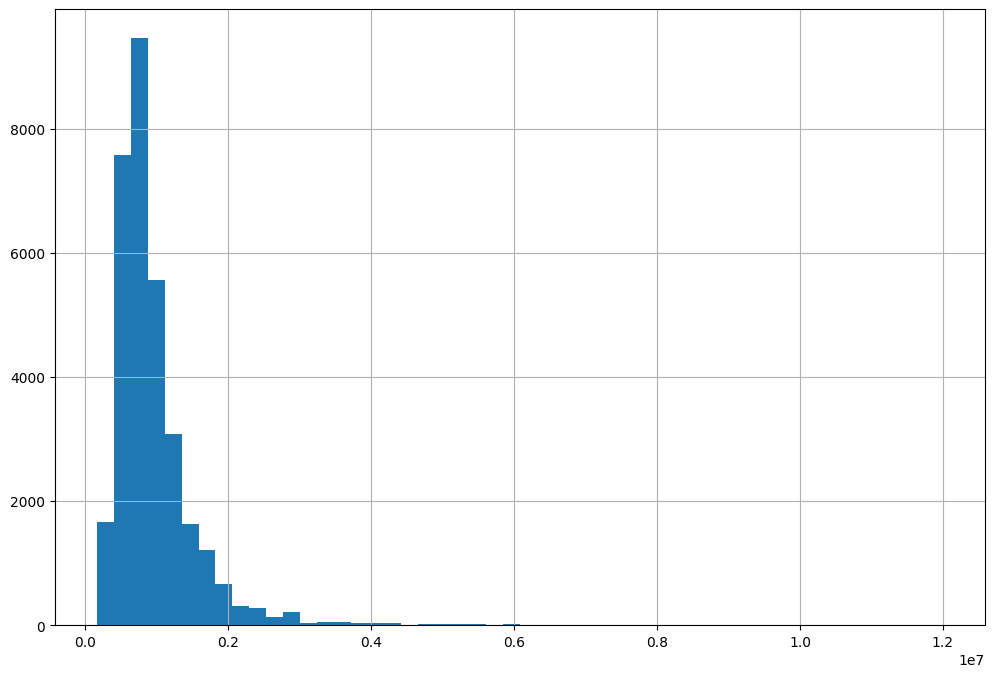

In [121]:
plt.figure(figsize=(12,8))
plt.grid()
plt.hist(df_enc["price"], bins=50)
plt.show()

In [122]:
df_enc["price"] = np.log1p(df_enc["price"])
df_enc["size_interior"] = np.log1p(df_enc["size_interior"])

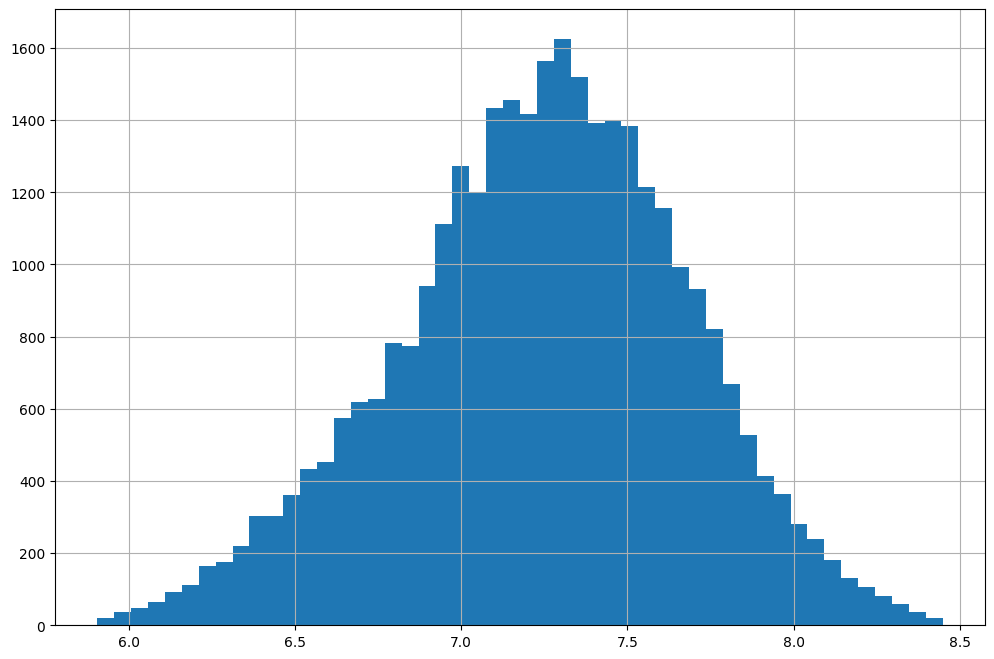

In [123]:
plt.figure(figsize=(12,8))
plt.grid()
plt.hist(df_enc["size_interior"], bins=50)
plt.show()

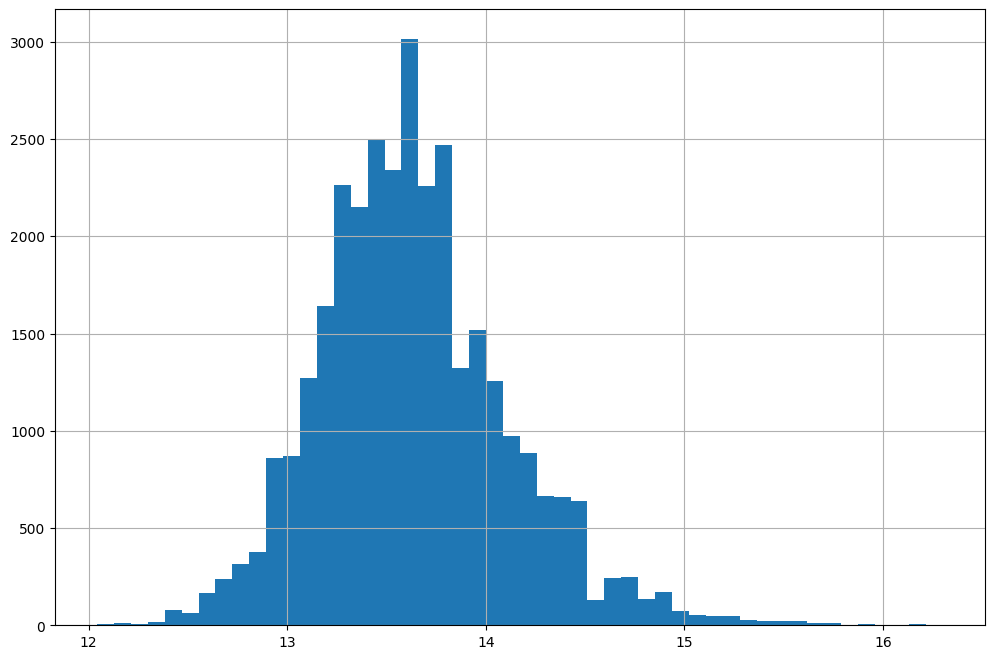

In [124]:
plt.figure(figsize=(12,8))
plt.grid()
plt.hist(df_enc["price"], bins=50)
plt.show()

In [125]:
from sklearn. preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(df_enc.drop("price", axis=1))
y_scaled = scaler_y.fit_transform(np.array(df_enc["price"]).reshape(-1,1))

In [126]:
y_scaled

array([[ 0.02991421],
       [-1.54323907],
       [ 0.28388451],
       ...,
       [-2.44966134],
       [-0.2312935 ],
       [-1.67738817]])

In [127]:
df_enc.corr(numeric_only=True)["price"].sort_values(ascending=False).head(20)

price                         1.000000
bathrooms_total               0.617527
size_interior                 0.583531
individual_income             0.471280
household_income              0.471280
bedrooms                      0.452456
parkings                      0.410772
single_family                 0.352977
building_type_House           0.336206
ownership_type_group_ids_1    0.316581
edu_bachelor_degree           0.287820
owners                        0.285627
stories_total                 0.276426
edu_university_certificate    0.263531
bedrooms_extra                0.253456
edu_post_graduate_degree      0.224903
multi_family                  0.217491
age_15_to_19                  0.206230
area_single_detached          0.202196
age_10_to_14                  0.178199
Name: price, dtype: float64

In [128]:
X_scaled.shape

(32102, 72)

In [129]:
from sklearn.model_selection import cross_val_score, KFold

In [130]:
kf = KFold(n_splits=5)

In [131]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=20)

In [132]:
cross_val_score(rf, X_scaled, y_scaled.ravel(), cv=kf, scoring="r2")

array([0.6878683 , 0.77761194, 0.62810092, 0.68544203, 0.74249207])

In [133]:
from xgboost import XGBRegressor

In [134]:
xgb = XGBRegressor()

In [135]:
cross_val_score(xgb, X_scaled, y_scaled, cv=kf, scoring="r2")

array([0.68797255, 0.80522505, 0.63084242, 0.69760526, 0.74100553])

In [136]:
xgb.fit(X_scaled, y_scaled)
y_pred = xgb.predict(X_scaled)

In [137]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [138]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [139]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.780714162677521

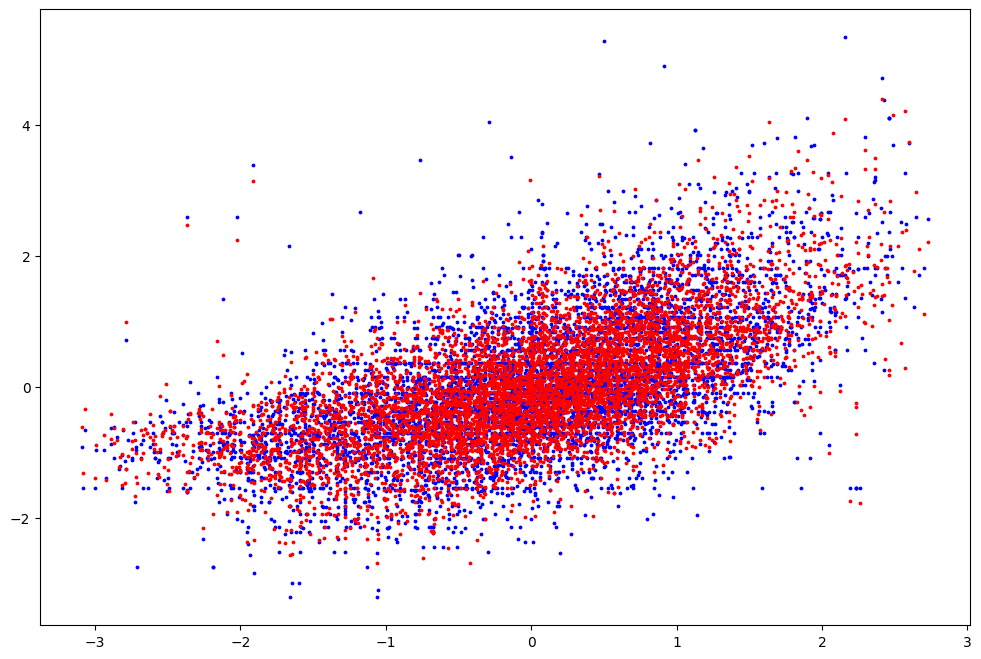

In [142]:
plt.figure(figsize=(12,8))
plt.scatter(X_test[:, 4], y_test, s=3, c="blue")
plt.scatter(X_test[:, 4], y_pred, s=3, c="red")

In [144]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

# Define the hyperparameter grid
param_grid = {
    'learning_rate': uniform(0.01, 0.3),  # Random float between 0.01 and 0.3
    'max_depth': randint(3, 10),           # Random integer between 3 and 10
    'subsample': uniform(0.5, 0.5),        # Random float between 0.5 and 1.0
    'colsample_bytree': uniform(0.5, 0.5), # Random float between 0.5 and 1.0
    'gamma': [0, 1, 5]                      # A list of specific values to choose from
}

# Initialize XGBoost regressor
model = XGBRegressor(random_state=42)

# Perform random search
random_search = RandomizedSearchCV(model, param_distributions=param_grid,
                                   n_iter=10, scoring='r2',
                                   cv=3, verbose=1, random_state=42)

random_search.fit(X_train, y_train)

# Retrieve best parameters and best estimator
print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_model.predict(X_test)

# Calculate RMSE on test data
test_rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print("Test RMSE:", test_rmse)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'colsample_bytree': 0.6872700594236812, 'gamma': 0, 'learning_rate': 0.06503043695984914, 'max_depth': 7, 'subsample': 0.7984250789732434}
Test RMSE: 1.328389254843819


In [146]:
y_pred2 = random_search.predict(X_test)

In [147]:
r2_score(y_test, y_pred2)

0.7862380884209578